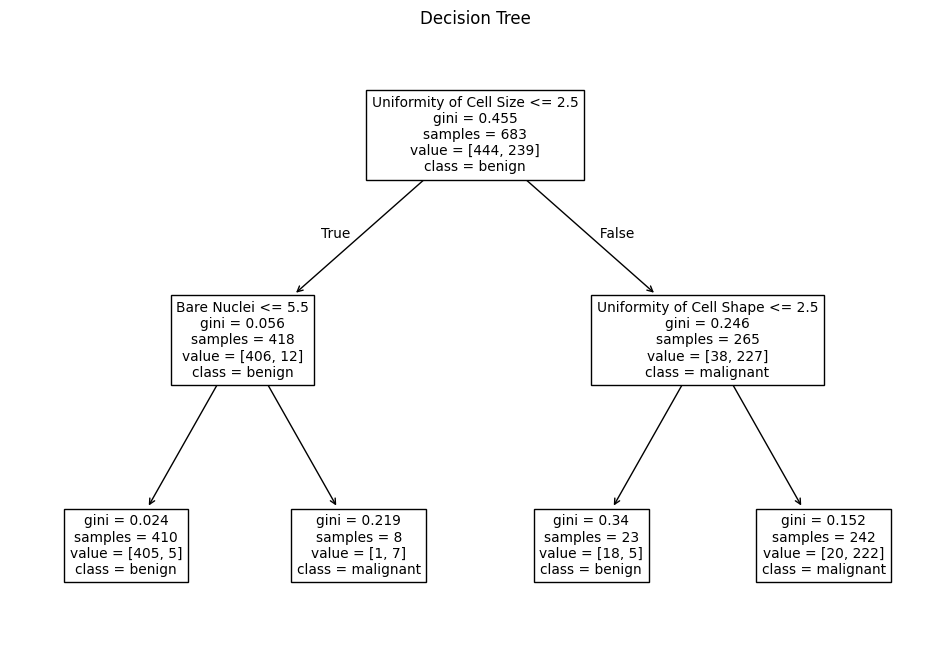


Decision tree structure：
|--- Uniformity of Cell Size <= 2.50
|   |--- Bare Nuclei <= 5.50
|   |   |--- class: 0
|   |--- Bare Nuclei >  5.50
|   |   |--- class: 1
|--- Uniformity of Cell Size >  2.50
|   |--- Uniformity of Cell Shape <= 2.50
|   |   |--- class: 0
|   |--- Uniformity of Cell Shape >  2.50
|   |   |--- class: 1


Split feature：Uniformity of Cell Size
Splitting threshold：2.50

Parent node：
Entropy：0.934
Gini：0.455
Misclassification Error：0.350

Child nodes：
Weighted Entropy：0.345
Weighted Gini：0.129
Weighted Misclassification Error：0.073

Information Gain：0.589


In [10]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
column_names = [
    "Sample code number", "Clump Thickness", "Uniformity of Cell Size", 
    "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", 
    "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"
]
data = pd.read_csv(url, header=None, names=column_names)

data = data.replace("?", np.nan)
data = data.dropna()

X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

y = y.replace({2: 0, 4: 1})

clf = DecisionTreeClassifier(
    max_depth=2, 
    min_samples_split=5, 
    min_samples_leaf=2, 
    criterion="gini", 
    random_state=42
)
clf.fit(X, y)

plt.figure(figsize=(12, 8))
plot_tree(
    clf,
    feature_names=X.columns.tolist(),
    class_names=["benign", "malignant"]
)
plt.title("Decision Tree")
plt.show()

tree_rules = export_text(clf, feature_names=list(X.columns))
print("\nDecision tree structure：")
print(tree_rules)

root_feature = X.columns[clf.tree_.feature[0]]
root_threshold = clf.tree_.threshold[0]
print(f"\nSplit feature：{root_feature}")
print(f"Splitting threshold：{root_threshold:.2f}")

def gini_impurity(y):
    p = np.mean(y)
    return 1 - p**2 - (1 - p)**2

def entropy(y):
    p = np.mean(y)
    if p == 0 or p == 1:
        return 0
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

def misclassification_error(y):
    p = np.mean(y)
    return 1 - max(p, 1 - p)

y_parent = y
parent_entropy = entropy(y_parent)
parent_gini = gini_impurity(y_parent)
parent_error = misclassification_error(y_parent)

print(f"\nParent node：")
print(f"Entropy：{parent_entropy:.3f}")
print(f"Gini：{parent_gini:.3f}")
print(f"Misclassification Error：{parent_error:.3f}")

def split_data(X, y, feature, threshold):
    left_mask = X[feature] <= threshold
    right_mask = X[feature] > threshold
    return y[left_mask], y[right_mask]

y_left, y_right = split_data(X, y, root_feature, root_threshold)

left_entropy = entropy(y_left)
right_entropy = entropy(y_right)
weighted_entropy = (len(y_left) / len(y)) * left_entropy + (len(y_right) / len(y)) * right_entropy

left_gini = gini_impurity(y_left)
right_gini = gini_impurity(y_right)
weighted_gini = (len(y_left) / len(y)) * left_gini + (len(y_right) / len(y)) * right_gini

left_error = misclassification_error(y_left)
right_error = misclassification_error(y_right)
weighted_error = (len(y_left) / len(y)) * left_error + (len(y_right) / len(y)) * right_error
print(f"\nChild nodes：")
print(f"Weighted Entropy：{weighted_entropy:.3f}")
print(f"Weighted Gini：{weighted_gini:.3f}")
print(f"Weighted Misclassification Error：{weighted_error:.3f}")

information_gain = parent_entropy - weighted_entropy
print(f"\nInformation Gain：{information_gain:.3f}")